In [55]:
import pandas as pd
df = pd.read_csv('csv/decessi_covid_province.csv')
df.head()

,data,provincia,decessi
0,2020-03-21,Sondrio,17
1,2020-03-22,Sondrio,20
2,2020-03-23,Sondrio,24
3,2020-03-24,Sondrio,30
4,2020-03-25,Sondrio,35


In [56]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df['decessi'] = pd.to_numeric(df['decessi'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       504 non-null    datetime64[ns]
 1   provincia  504 non-null    object        
 2   decessi    504 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.9+ KB


In [57]:
df=df.groupby('data').sum()
df.head()

,decessi
data,
2020-03-21,332
2020-03-22,376
2020-03-23,409
2020-03-24,455
2020-03-25,487


In [58]:
#dato che il numero di decessi è riportato per incremento effettuo l'operazione di differenza per trovare il numero effettivo
import numpy as np

df_diff = df.diff()
df_diff = df_diff.dropna()
df_diff.head()

,decessi
data,
2020-03-22,44.0
2020-03-23,33.0
2020-03-24,46.0
2020-03-25,32.0
2020-03-26,39.0


In [59]:
ts = df_diff.decessi
ts

data
2020-03-22    44.0
2020-03-23    33.0
2020-03-24    46.0
2020-03-25    32.0
2020-03-26    39.0
              ... 
2020-05-18     5.0
2020-05-19     1.0
2020-05-20     5.0
2020-05-21     3.0
2020-05-22     7.0
Name: decessi, Length: 62, dtype: float64

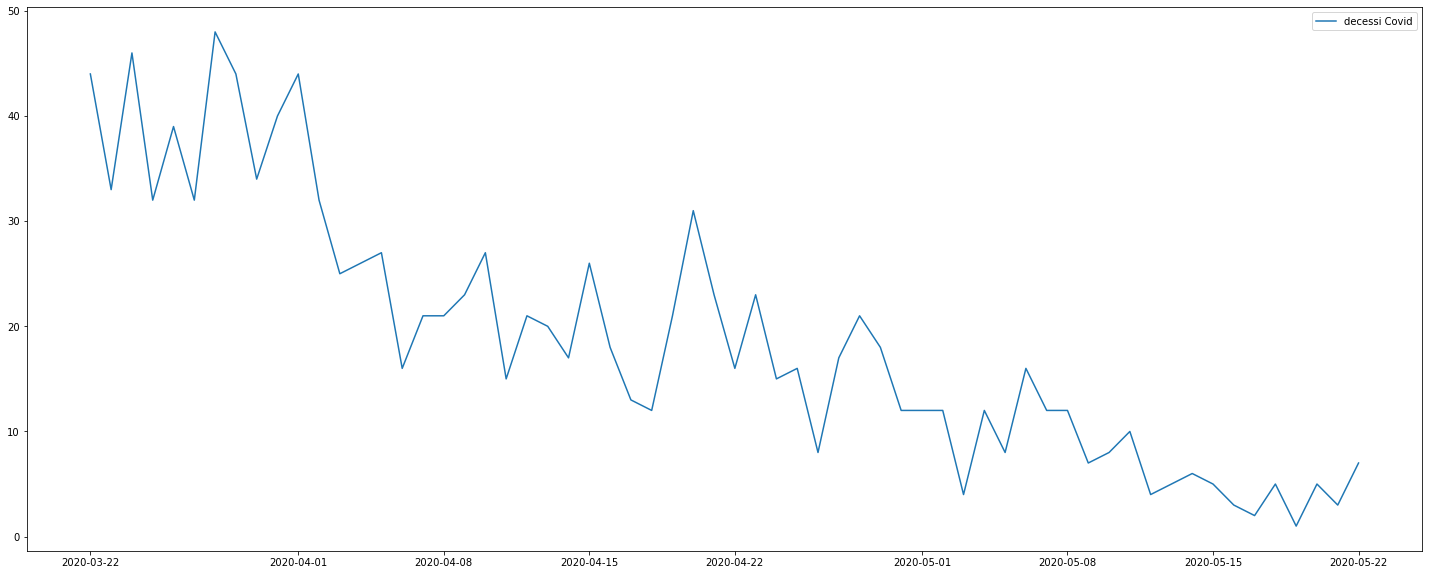

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.plot(ts, label='decessi Covid')

plt.legend()
plt.show()

In [61]:
df_diff.to_csv('csv/decessi_covid19_8province.csv')